In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [152]:
df1 = pd.read_csv('bhp.csv')
display(df1.head())
df1.shape


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


(13200, 7)

In [169]:
df2 = df1[(df1.price_per_sqft > df1.price_per_sqft.quantile(0.001)) & (df1.price_per_sqft < df1.price_per_sqft.quantile(0.999))]
df2.head()
df2.shape

(13172, 7)

In [170]:
df3 = df2[(df2.price_per_sqft > df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()) & (df2.price_per_sqft < df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std())]
display(df3.head())
df3.shape

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


(13047, 7)

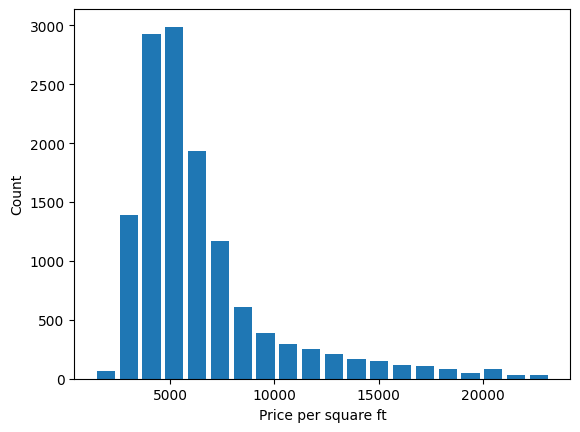

In [173]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

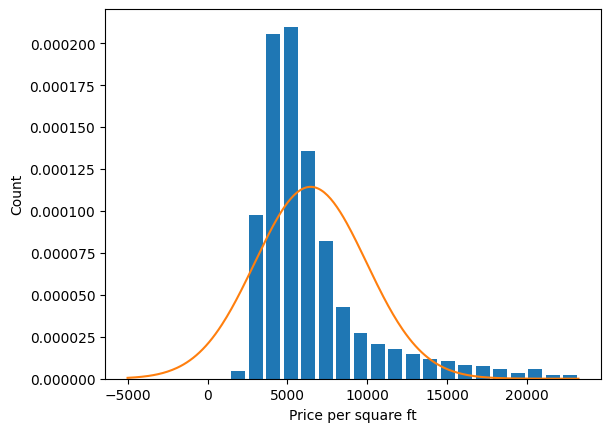

In [179]:
from scipy.stats import norm
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price per square ft')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [184]:
df4 = df2.copy()
df4['zscore'] = (df4.price_per_sqft - df4.price_per_sqft.mean()) / df4.price_per_sqft.std()
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [185]:
df4 = df4[(df4.zscore > -4) & (df4.zscore < 4)]
df4.head()
df4.shape

(13047, 8)

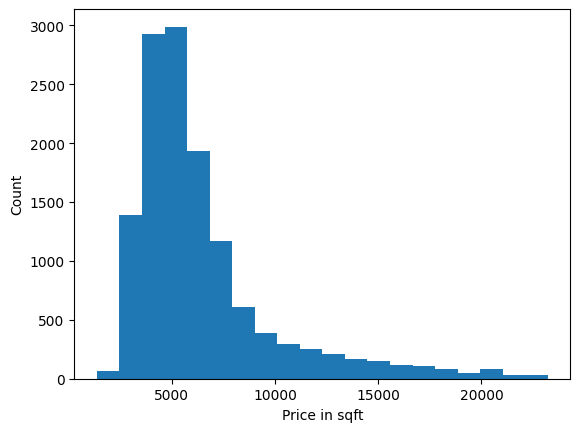

In [186]:
plt.hist(df4.price_per_sqft, bins=20)
plt.xlabel('Price in sqft')
plt.ylabel('Count')
plt.show()